# Text extraction

In this example, you will learn how to extract text from images/documents and format the output in different ways using MLX-VLM library and `Qwen2-VL` model.


## Structured outputs
- Image to markdown
- Image to json
- Image to latex

In [1]:
from mlx_vlm import load, apply_chat_template, generate
from mlx_vlm.utils import load_image

This is a beta version of the video understanding. It may not work as expected.


In [2]:
# Load model and processor
qwen_vl_model, qwen_vl_processor = load("mlx-community/Qwen2-VL-7B-Instruct-4bit")
qwen_vl_config = qwen_vl_model.config

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/108k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.67G [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


## Image to markdown

In [3]:
image = load_image("images/paper.png")

messages = [
    {"role": "system", "content": """
    You are an expert at extracting text from images. Format your response in markdown.
    Format your response as follows:
    # Title
    - Authors, Affiliation, Email
    ## Subtitle
    ### Subsubtitle
    Paragraph
    """},
    {"role": "user", "content": "Extract all the text from the image."}
]

In [4]:
# Apply chat template
prompt = apply_chat_template(qwen_vl_processor, qwen_vl_config, messages)

In [18]:
# Generate text
qwen_vl_output = generate(
    qwen_vl_model,
    qwen_vl_processor,
    prompt,
    image,
    max_tokens=1000,
    temperature=0.7,
)

In [19]:
print(qwen_vl_output)

$$\text{FFN}(x) = \max (0, xW_1 + b_1)W_2 + b_2$$


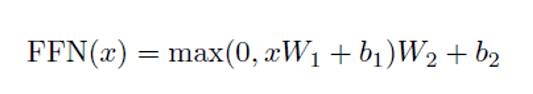

In [20]:
image

## Image to json

In [21]:
image = load_image("images/graph.png")

messages = [
    {"role": "system", "content": "You are an expert at extracting text from images. Format your response in json."},
    {"role": "user", "content": "Extract the names, labels and y coordinates from the image."}
]

In [22]:
# Apply chat template
prompt = apply_chat_template(qwen_vl_processor, qwen_vl_config, messages)

In [34]:
# Generate text
qwen_vl_output = generate(
    qwen_vl_model,
    qwen_vl_processor,
    prompt,
    image,
    max_tokens=1000,
    temperature=0.7,
)

In [35]:
print(qwen_vl_output)

$$\text{FFN}(x) = \max (0, xW_1 + b_1)W_2 + b_2$$


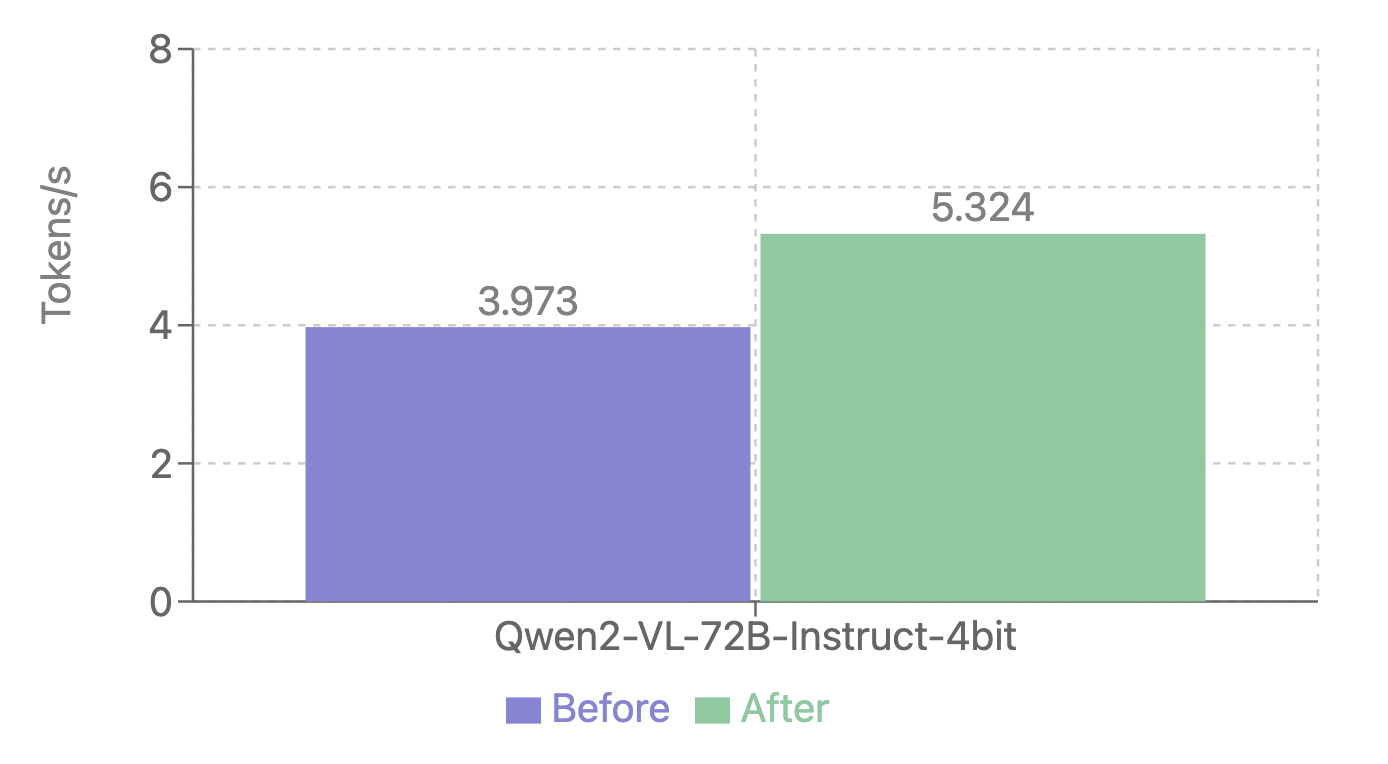

In [25]:
image

## Image to latex

In [26]:
image = load_image("images/latex.png")

messages = [
    {"role": "user", "content": "Extract the text from the image and format it into latex."}
]

In [27]:
# Apply chat template
prompt = apply_chat_template(qwen_vl_processor, qwen_vl_config, messages)

In [31]:
# Generate text
qwen_vl_output = generate(
    qwen_vl_model,
    qwen_vl_processor,
    prompt,
    image,
    max_tokens=1000,
    temperature=0.7,
)

In [32]:
# Display latex code, import the necessary libraries
from IPython.display import Latex
Latex(qwen_vl_output)

<IPython.core.display.Latex object>

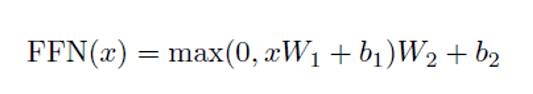

In [33]:
image